<a href="https://colab.research.google.com/github/TomasManuelObregon/Python/blob/Labo2/clase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Defino e Importo cosas.

In [42]:
# Importo las librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as op

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Magnitudes de la soga

masa_soga     = 0.4339 /1000 #/1000 para pasarlo a kg
err_masa_soga = 0.0001 /1000
largo_soga    = 275.5 /100 #/100 para pasarlo a mts
err_largo_soga= 0.05 /100
r_soga        = 0.02 /1000 #/1000 para pasarlo a mts

vol_soga = np.pi*(r_soga**2)*largo_soga 

# Densidad Lineal
mu     = masa_soga/largo_soga
err_mu = np.sqrt((err_masa_soga/largo_soga)**2 + ((mu/largo_soga)*err_largo_soga)**2)

print(f'Densidad Lineal: ({np.round(mu, decimals=8)} ± {np.round(err_mu, decimals=8)}) kg/m')


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

pesos = [60.03, 109.9, 160.30, 209.9, 259.90]


Densidad Lineal: (0.0001575 ± 5e-08) kg/m


#### Def de funciones:


In [86]:
# Funcion para hacer los ajustes

def lin(x,m, b): return m*x + b

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

g = 9.7968520

err_tension  = g * 0.1/1000 # 0.1 es el error de la balanza
err_dist = np.array([1,1/np.sqrt(2),2/np.sqrt(3),1,2/np.sqrt(5)])/100 # mts Divido por la raiz de la cantidad de mediciones porque es un promedio :)


def Velocidad(peso, datos):
  data = np.loadtxt(datos, skiprows=1, delimiter=';')

  frec     = data[:,0]
  err_frec = data[:,1]
  dist     = data[:,2]/100

  # - - - - - - - - - - - - - - -

  tension          = g * peso/1000

  vel_densidad     = np.sqrt(tension/mu)
  err_vel_densidad = np.sqrt((err_tension/np.sqrt(4*tension*mu))**2 + (err_mu * np.sqrt(tension)/(2*((mu)**(3/2))))**2)

  long_onda              = np.array(2 * dist)
  err_long_onda          = np.array(2 * err_dist)

  unosobre_long_onda     = 1/long_onda
  err_unosobre_long_onda = err_long_onda * unosobre_long_onda**2

  # - - - - - - - - - - - - - - -
  # Ajuste
  popt, pcov = op.curve_fit(lin, unosobre_long_onda, frec, sigma=err_frec, absolute_sigma = True)
  pend     = popt[0]
  ord      = popt[1]
  err_pend = pcov[0][0]

  dom = np.linspace(min(unosobre_long_onda), max(unosobre_long_onda), 1000)
  im  = lin(dom, pend, ord)

  # - - - - - - - - - - - - - - -
  # Gráfico
  plt.figure(figsize=[8,4])

  plt.scatter(unosobre_long_onda, frec, c='black', marker='o', label='Datos')
  plt.errorbar(unosobre_long_onda, frec, xerr=err_unosobre_long_onda ,yerr= err_frec, linewidth= 0, elinewidth= 2, capsize = 3, c='red', label= 'Error')
  plt.plot(dom, im, c='orange', label='Ajuste Lineal')

  plt.title(f'Peso: {peso}g ; Tensión: {np.round(tension, decimals=2)}N')
  plt.xlabel(r"$λ^{-1} \hspace{0.3} [m^{-1}]$", fontsize=15)
  plt.ylabel(r"$Frecuencia \hspace{0.3} [Hz]$", fontsize=15)
  plt.legend(fontsize='15')
  plt.grid()
  plt.show()

  # Resultados
  print(f'Pendiente: {np.round(pend, decimals=3)} ± {np.round(err_pend, decimals=3)} m/s (calculada con la relacion de dispersion)')
  print(f'Velocidad: {np.round(vel_densidad, decimals=3)} ± {np.round(err_vel_densidad, decimals=3)} m/s (calculada con μ)\n\n')

### Gráficos

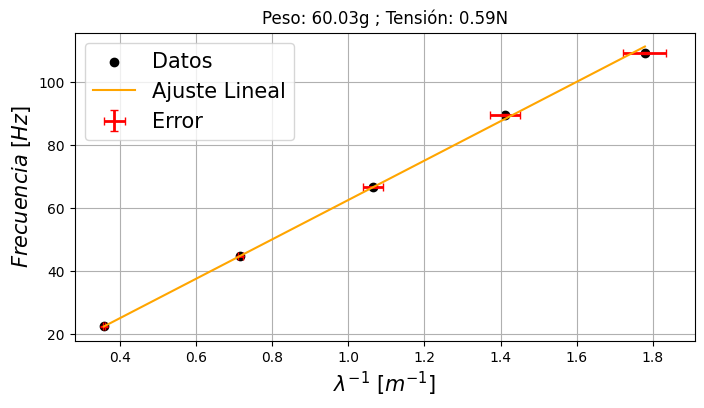

Pendiente: 62.457 ± 0.009 m/s (calculada con la relacion de dispersion)
Velocidad: 61.107 ± 0.052 m/s (calculada con μ)




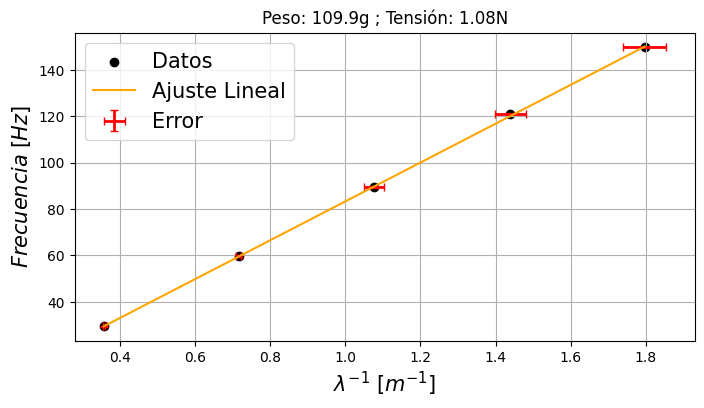

Pendiente: 83.812 ± 0.001 m/s (calculada con la relacion de dispersion)
Velocidad: 82.681 ± 0.04 m/s (calculada con μ)




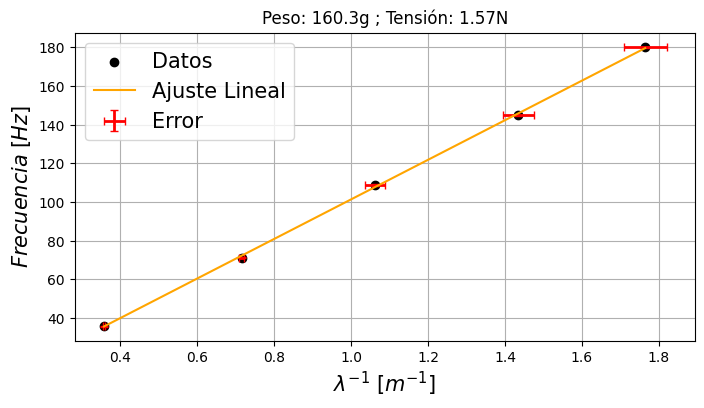

Pendiente: 102.395 ± 0.027 m/s (calculada con la relacion de dispersion)
Velocidad: 99.856 ± 0.034 m/s (calculada con μ)




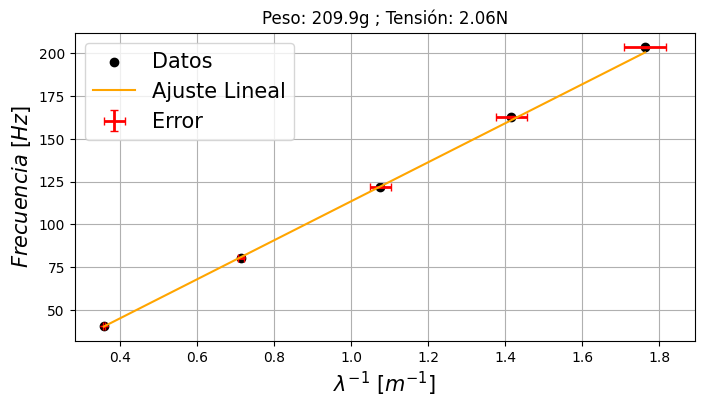

Pendiente: 114.026 ± 0.014 m/s (calculada con la relacion de dispersion)
Velocidad: 114.266 ± 0.032 m/s (calculada con μ)




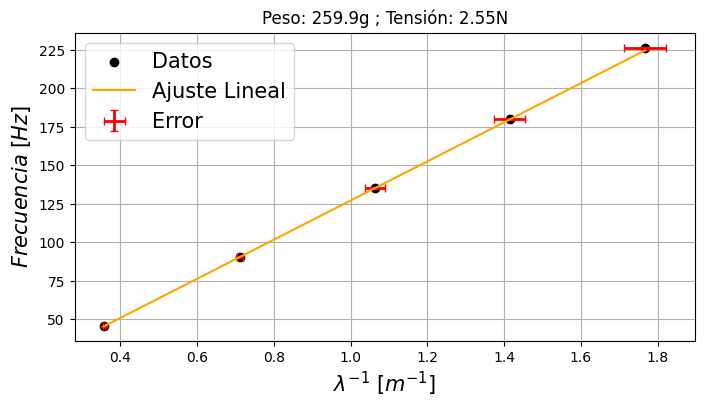

Pendiente: 127.167 ± 0.014 m/s (calculada con la relacion de dispersion)
Velocidad: 127.149 ± 0.031 m/s (calculada con μ)




In [87]:
Velocidad(pesos[0], 'peso1.csv')
Velocidad(pesos[1], 'peso2.csv')
Velocidad(pesos[2], 'peso3.csv')
Velocidad(pesos[3], 'peso4.csv')
Velocidad(pesos[4], 'peso5.csv')